In [68]:
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
import re
import string

In [69]:
# Load movies data on DF
df = pd.read_parquet('data/movies_clean.pq')

In [70]:
df.shape

# Maybe reduction or partition of the dataset may be required

(45429, 19)

In [80]:
pd.set_option('display.width', 1000)
df.sample(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,director
79,None,0.0,"['Family', 'Drama']",46785,fa,Several people try to take advantage of a litt...,1.196256,"['I.R.I.B. Channel 2', 'Ferdos Films']",['Iran'],1995-01-01,0.0,85.0,Released,The White Balloon,7.5,20.0,1995,0.00,Jafar Panahi
10680,None,0.0,"['Drama', 'Fantasy']",4495,es,"In the aftermath of the Spanish Civil War, Ana...",5.446736,['Elías Querejeta Producciones Cinematográfica...,['Spain'],1973-10-08,0.0,97.0,Released,The Spirit of the Beehive,7.5,75.0,1973,0.00,Víctor Erice
23392,None,160000000.0,"['Action', 'Science Fiction', 'Thriller']",124905,en,"Ford Brody, a Navy bomb expert, has just reuni...",14.019239,"['Toho Company', 'Legendary Pictures', 'Warner...","['Japan', 'United States of America']",2014-05-14,529076069.0,123.0,Released,Godzilla,6.1,3232.0,2014,3.31,Gareth Edwards
12274,None,7800000.0,['Drama'],25460,en,While fighting for a woman who sits on death r...,2.463468,"['Audley Films LLP', 'Moviefan Scandinavia A/S...","['Denmark', 'United Kingdom', 'United States o...",2004-09-17,0.0,109.0,Released,Return to Sender,5.9,13.0,2004,0.00,Bille August
6784,None,0.0,['Comedy'],20684,en,"Henry Harding MP, a British government ministe...",1.25361,"['Cyclops Vision', 'PTTP Films']",['United Kingdom'],1997-07-04,0.0,100.0,Released,Preaching to the Perverted,6.5,8.0,1997,0.00,Stuart Urban


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45429 entries, 0 to 45428
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4495 non-null   object 
 1   budget                 45429 non-null  float64
 2   genres                 45429 non-null  object 
 3   id                     45429 non-null  int64  
 4   original_language      45418 non-null  object 
 5   overview               45429 non-null  object 
 6   popularity             45429 non-null  object 
 7   production_companies   45429 non-null  object 
 8   production_countries   45429 non-null  object 
 9   release_date           45429 non-null  object 
 10  revenue                45429 non-null  float64
 11  runtime                45183 non-null  float64
 12  status                 45349 non-null  object 
 13  title                  45429 non-null  object 
 14  vote_average           45429 non-null  float64
 15  vo

In [72]:
df.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_year,return
count,4.542900e+04,45429.000000,4.542900e+04,45183.000000,45429.000000,45429.000000,45429.000000,4.542900e+04
mean,4.232302e+06,107994.348742,1.122324e+07,94.178784,5.624130,109.993176,1991.879240,6.592733e+02
std,1.743291e+07,112120.983871,6.435476e+07,38.328436,1.915169,491.433718,24.058656,7.464971e+04
min,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26368.000000,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59873.000000,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156335.000000,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


1) Numerics values does not seems to say much for recomendation of similar movies
2) Let's analyze text based columns

In [74]:
def plot_top_words_barchart(text):
    """
    Plot top 12 words in the specified column
    excluding stopwords and words with len < 3 
    """

    stop=set(stopwords.words('english'))
  
    new=text.str.lower()   
    new = new.apply(lambda w: re.sub('[%s]' % re.escape(string.punctuation), '', w) )

    new= new.str.split()
    new = new.values.tolist()
    corpus = []
    for i in new:
        for j in i:
            if len(j)>2 and j not in stop:
                corpus.append(j)

    counter=Counter(corpus)
    most=counter.most_common()

    x, y=[], []
    for word,count in most[:12]:
        if (word not in stop):
            x.append(word)
            y.append(count)
        
            
    sns.barplot(x=y,y=x)



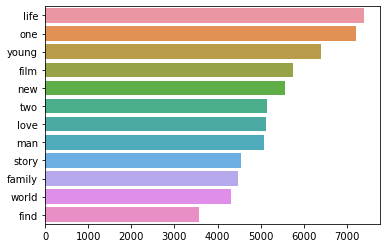

In [75]:
# word distribution for overview
plot_top_words_barchart(df['overview'].dropna())

# Looks OK

<AxesSubplot:>

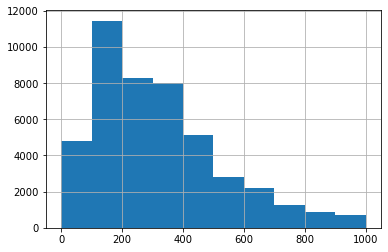

In [79]:
# Word count distribution for overview
df['overview'].str.len().hist()

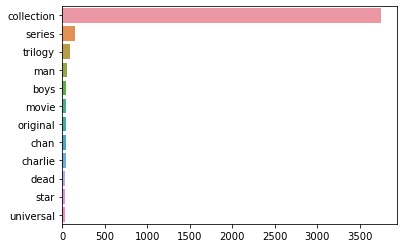

In [76]:
# word distribution for belongs_to_collection
plot_top_words_barchart(df['belongs_to_collection'].dropna())

# collection, series &trilogy would be removed

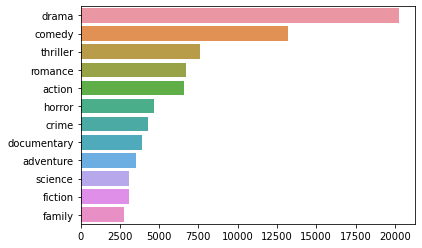

In [77]:
# word distribution for genres
plot_top_words_barchart(df['genres'].dropna())

# Looks OK

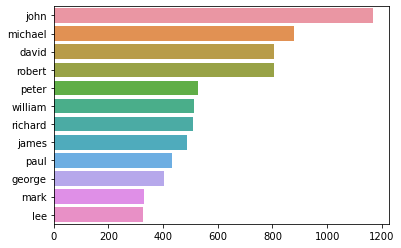

In [78]:
# word distribution for director
plot_top_words_barchart(df['director'].dropna())

# Should join first & lastname or use ngram_range=(1,2) in model to make it usable